#**Predicting Rent with Household Characteristics**
---

## 1. Introduction

### 1.1. Motivation

The cost of rent is a critical financial consideration for households and a key revenue source for property managers. Understanding the drivers behind rent variations can help property managers price units effectively, and assist policymakers in addressing affordability disparities.

This project aims to investigate if some selected factors influence a household's monthly rent. I discovered that household income, the number of rooms in the property, and the household's access to the internet are three significant predictors for monthly rent.

### 1.2. Research Questions

We focus on the following research questions:

1.  How strongly does household income correlate with monthly rent?
2.  Does the size of a rented property, as measured by the number of rooms, impact the cost of rent?
3.  How does access to the internet relate to rent prices? Are there differences in rent costs for households with or without internet access?
4.  Are utility expenses, specifically the monthly costs of gas and electricity, significant predictors of rent?

In our multiple linear regression model, we tested the hypothesis that there is a positive correlation between all the quantitative explanatory variables and monthly rent. We also hypothesized that there is a significant difference between households with different levels of internet access.

## 2. Data Collection and Preparation

### 2.1. Data Source

Our dataset comes from the American Community Survey (ACS), which is a survey the Census Bureau uses to determine how federal and state funds are distributed in the US. Over 3.5 million households are randomly selected to participate each year, and for this project, we will be using the ACS data collected in 2019. Therefore, the larger population we are addressing in this study is the US population in 2019. For this analysis, we focus on a subset of the survey data that captures essential variables related to household characteristics and monthly rent, encompassing a sample size of 361 observations after data cleaning.

In [ ]:
install.packages("mosaic")
install.packages("gridExtra")
install.packages("grid")
install.packages("knitr")
install.packages("leaps")
install.packages("car")
install.packages("Stat2Data")
install.packages("broom")
install.packages("rvest")
install.packages("methods")
install.packages("dplyr")
install.packages("GGally")
install.packages("DescTools")
install.packages("ggrepel")
install.packages("caret")
library(ggrepel)
library(mosaic)
library(gridExtra)
library(grid)
require(knitr)
opts_chunk$set(
  tidy=FALSE,
  size="small"
)
library(leaps)
library(car)
library(Stat2Data)
library(leaps)
library(broom)
library(rvest)
library(methods)
library(dplyr)
library(tidyr)
library(GGally)
library(DescTools)
library(ggplot2)
options(digits = 6)
trellis.par.set(theme=theme.mosaic())
options(digits=5)

#import data
dataset <- read.csv('2019ACS_housing.csv')

### 2.2. Data Pre-processing

Given the dataset’s complexity and some incomplete responses, the following actions were taken to prepare the data for analysis:

1.  Handling Missing Values: Observations with missing values in any of the primary variables of interest were excluded from the analysis, resulting in a final dataset with 361 observations.
2.  Variable Transformations: Many of the quantitative variables, including household income and the number of rooms, exhibited right-skewed distributions. To improve the model’s fit, these variables were transformed using a square root function, which helped normalize the distributions and satisfy assumptions required for linear regression.
3.  Categorical Variables: For the variable related to internet access, initial values were coded into three levels: households paying for internet, households with unpaid access, and households without access. During analysis, we simplified this variable by combining the first two categories (internet access) and leaving the third as a separate category (no internet access) after determining that rent costs were statistically similar between households with paid and unpaid internet access.

In [ ]:
dataset <- dataset[, c("NOC", "RMSP", "GASP","ELEP","HINCP","ACCESS", "RNTP")]

#Eliminating all the missing data in our variables
 dataset <- dataset %>%
  drop_na(ACCESS, RNTP, NOC, RMSP, GASP, ELEP, HINCP)

### 2.3. Key Variables

**Response variable**: Monthly Rent (RNTP), which is a quantitative variable measuring the amount of rent each household pays in a month, in rounded dollar amounts. Among 5000 observations, 1016 observations contain values for Monthly Rent, ranging from 4 dollars to 3900 dollars. After removing all observations missing at least one of our variables, we are left with 361 observations.

**Explanatory Variables**: For the explanatory variables, values of "b" indicate that no occupants were living in the house when the interviewers went there, and values of "N/A" meant that data was not available for that question in that household. We removed all observations with missing entries (both "b" and "N/A") in our explanatory variables from our dataset to fix the size of the models that we later wanted to compare. Therefore, we now have 361 observations.

- Number of own children in household (NOC): measuring the number of children in the household (unweighted).

- Number of Rooms (RMSP): measuring the number of rooms in the unit.

- Monthly Cost of Gas (GASP): measuring the monthly cost of gas in dollars.

- Monthly Cost of Electricity (ELEP): measuring the monthly cost of electricity in dollars.

- Household income (HINCP): measuring the household income (in dollars) in the past 12 months at the time the survey was conducted.

- Access to to the Internet (ACCESS): a categorical variable with 3 levels coded as: (1) payed a cell phone company or Internet service provider for access to the internet, (2) had access to the Internet but did not pay a cell phone company or Internet service provider for it, and (3) do not have access to the Internet.

## 3. Exploratory Data Analysis

We first did EDA on all our variables and removed all the observations with missing information in at least one of the variables of our interests.

All of our quantitative variables have distributions that are skewed right, so we will use median and IQR as the measures of center and spread for all of our quantitative variables. Additionally, all variables aside from Access to internet are quantitative.

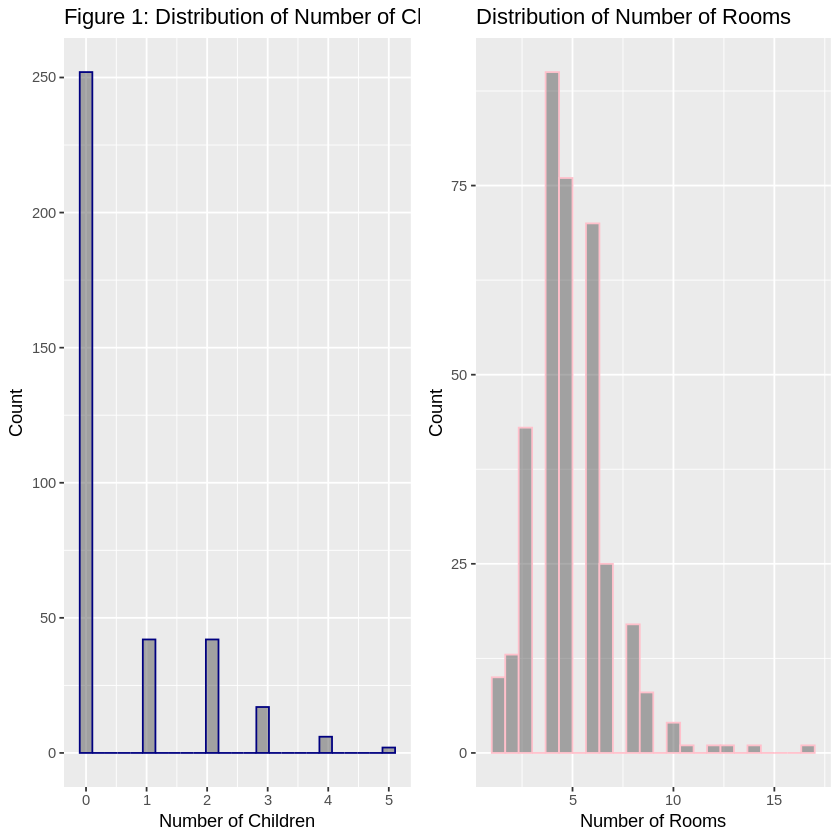

In [ ]:
#Distributions for our variables
m1 <- gf_histogram( ~NOC, data = dataset, color = "navy")%>%
  gf_labs(x = "Number of Children", y = "Count", title = "Figure 1: Distribution of Number of Children")
# kable(favstats(~ NOC, data = household_df), caption = "Table 1")

m2 <- gf_histogram(~ RMSP, data = dataset, color = "pink")%>%
  gf_labs(x = "Number of Rooms", y = "Count", title = "Distribution of Number of Rooms")
# kable(favstats(~ RMSP, data = household_df), caption = "Table 2")

m3 <- gf_histogram(~ GASP, data = dataset, color = "magenta")%>%
  gf_labs(x = "Monthly Gas Cost", y = "Count", title = "Figure 2: Distribution of Gas Cost")
# kable(favstats(~ GASP, data = household_df), caption = "Table 3")

m4 <- gf_histogram(~ ELEP, data = dataset, color = "purple")%>%
  gf_labs(x = "Electricity Cost", y = "Count", title = "Distribution of Electricity Cost")
# kable(favstats(~ ELEP, data = household_df), caption = "Table 4")

m5 <- gf_histogram(~ HINCP, data = dataset, color = "lightskyblue")%>%
  gf_labs(x = "Household Income", y = "Count", title = "Figure 3: Distribution of Household Income")
# kable(favstats(~ HINCP, data = household_df), caption = "Table 5")

m6 <- gf_bar(~ ACCESS, data = dataset, color = "forestgreen")%>%
  gf_labs(x = "Access to Internet", y = "Count", title = "Distribution of Internet Access")
# kable(tally (~ ACCESS, data=household_df), caption = "Table 6")

m7 <- gf_histogram(~ RNTP, data = dataset, color = "red")%>%
  gf_labs(x = "Monthly Rent", y = "Count", title = "Figure 4: Distribution of Monthly Rent")
grid.arrange(m1, m2, ncol=2)

**Figure 1.** Number of Children: The descriptive plot we will use for this variable is a histogram. The distribution of this variable is right skewed and unimodal with a median of 0 (having no child), a range of 0 to 5, and interquartile is 1 which range from Q1 (no own child) to Q3 (1 child). The majority of households in the sample do not have children (\>250)

Number of Rooms: The descriptive plot we will use for this variable is a histogram. Because the data distribution is right-skewed and unimodal, we will use median (which is 5) and IQR is 2 (which ranges from Q1=4 to Q3=6) as the measure of center and spread.

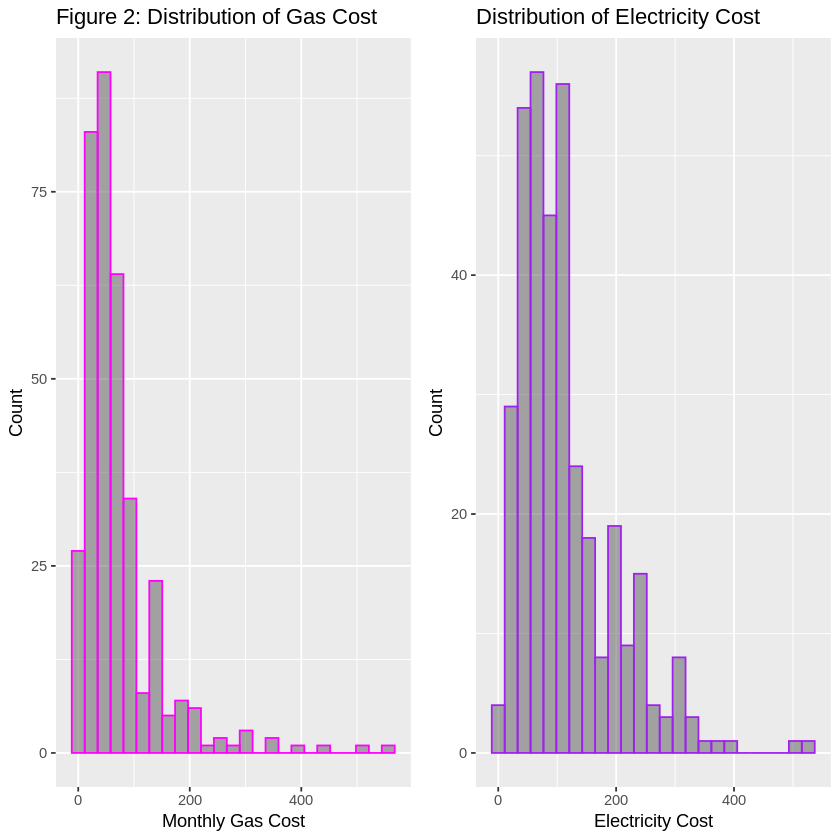

In [ ]:
grid.arrange(m3, m4, ncol = 2)

**Figure 2.** Monthly Gas Price: The descriptive plot we will use for this variable is a histogram. Because the data distribution is right-skewed and unimodal, we will use median (which is \$50) and IQR (which ranges from Q1=30 to Q3=90) as the measure of center and spread.

Monthly Electricity Price: The descriptive plot we will use for this variable is a histogram. Because the data distribution is right-skewed we will use median and IQR as the measure of center and spread. Because the data distribution is right-skewed and unimodal, we will use median (which is \$90) and IQR (which ranges from Q1=60 to Q3=150) as the measure of center and spread.

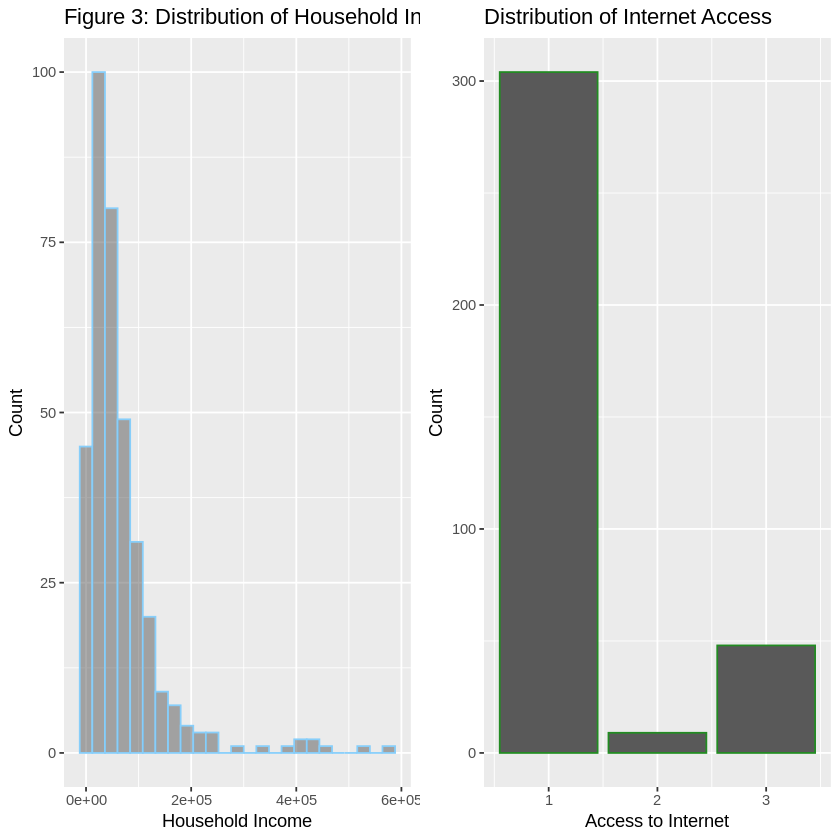

In [ ]:
grid.arrange(m5, m6, ncol = 2)

**Figure 3.** Household Income: As we removed the observations with missing entries, we also removed all the negative values from our dataset. The distribution of this variable is right skewed and unimodal with a median household income of \$46000, a range of \$0 to \$576000, and interquartile range from Q1=\$22400 to Q3=\$83000. The descriptive plot we will use for this variable is a histogram.

Internet Access: The bar chart for the qualitative variable access to the internet shows that the majority (84.2% - 304 households) of the sample population had (1 - payed for access to the internet), 2.5% or 9 households had (2 - access to the internet but did not pay), and 13.3% has (3 - no access to internet). The descriptive plot we will use for this variable is a bar chart.

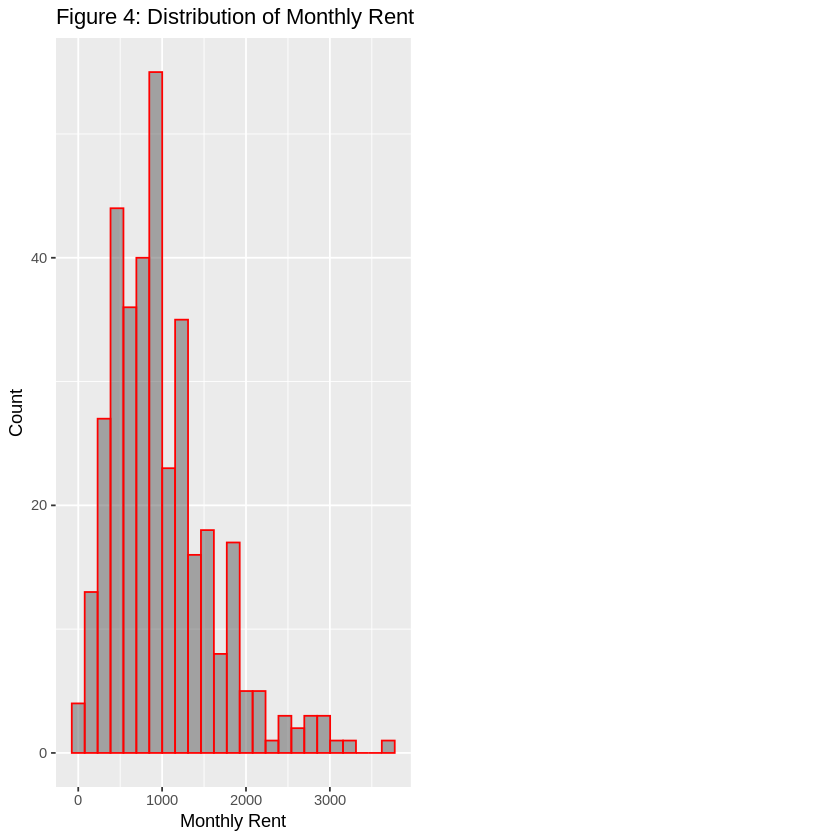

In [ ]:
grid.arrange(m7, ncol = 2)

**Figure 4.** The distribution of this variable is right skewed and unimodal with a median household income of \$880, a range of \$4 to \$3700, and IQR is \$750 which range from Q1 (\$550) to Q3 (\$1300).

Warning message:
“Using the `size` aesthetic with geom_line was deprecated in ggplot2 3.4.0.
ℹ Please use the `linewidth` aesthetic instead.”


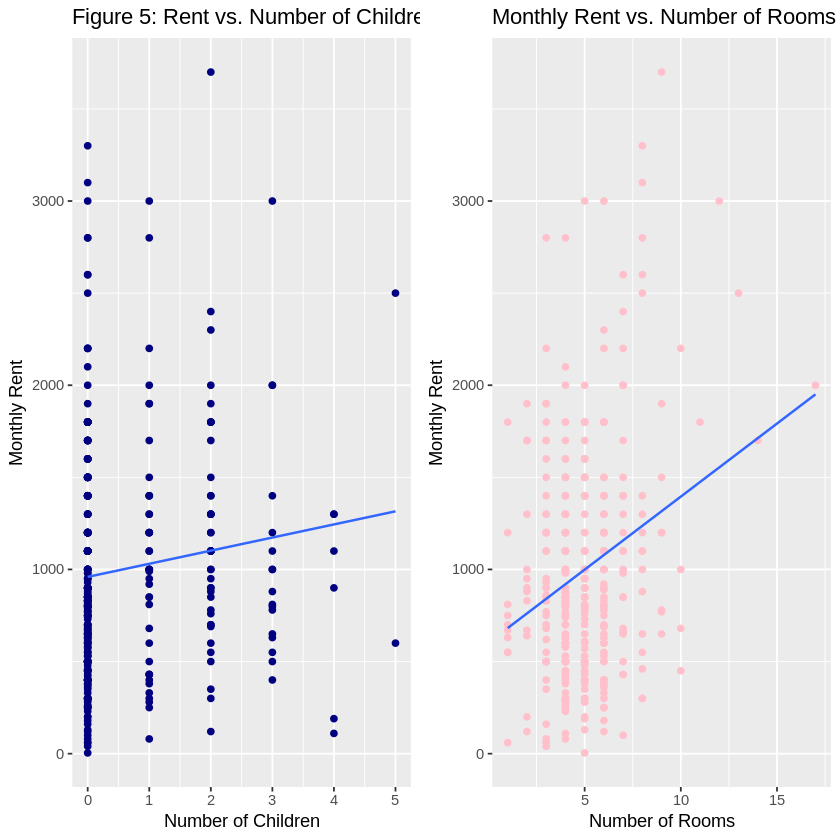

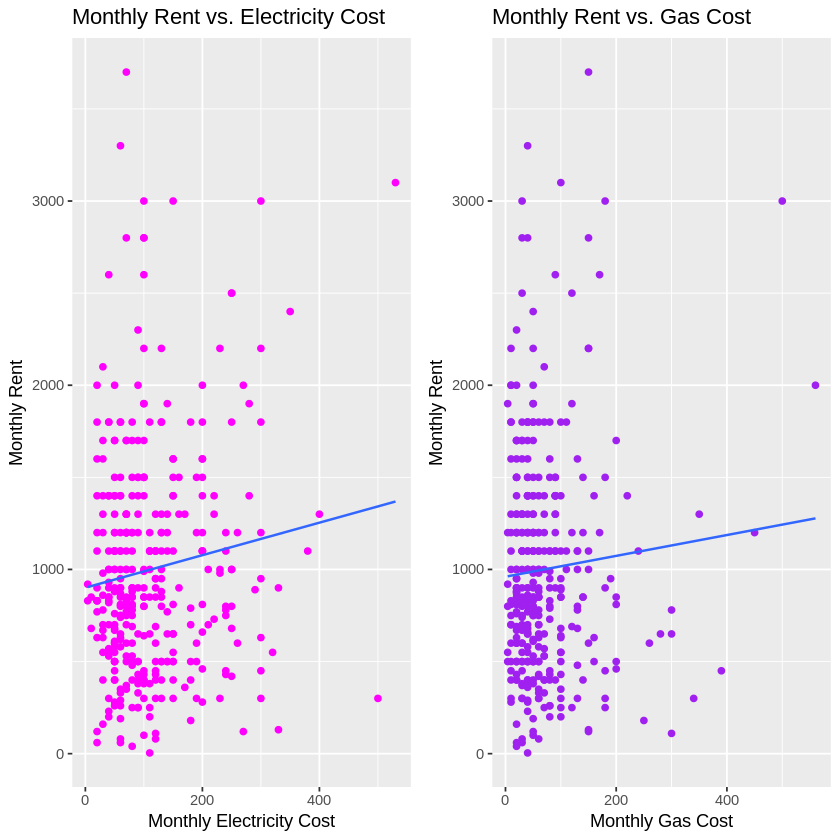

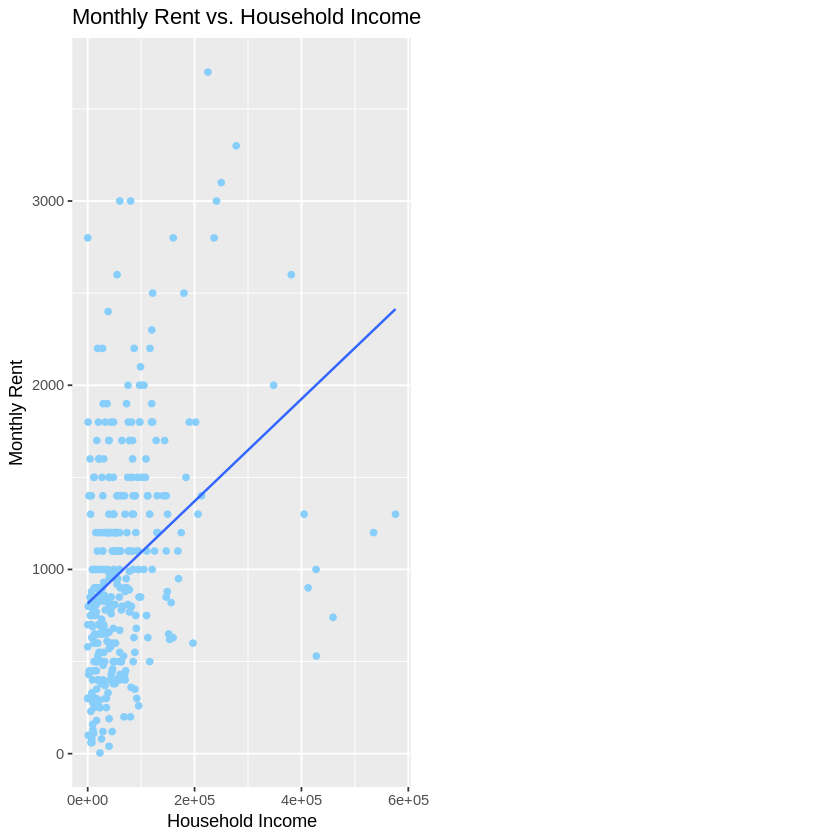

In [ ]:
#Running bivariate analysis by creating individual scatter plots of the response variable against each predictor variable
m8 <- gf_point(RNTP ~ NOC, data = dataset, color = "navy")%>%
  gf_lm()%>%
  gf_labs(title = "Figure 5: Rent vs. Number of Children", x = "Number of Children", y = "Monthly Rent")

m9 <- gf_point(RNTP ~ RMSP, data = dataset, color = "pink")%>%
  gf_lm()%>%
  gf_labs(title = "Monthly Rent vs. Number of Rooms", x = "Number of Rooms", y = "Monthly Rent")

m10 <- gf_point(RNTP ~ ELEP, data = dataset, color = "magenta")%>%
  gf_lm()%>%
  gf_labs(title = "Monthly Rent vs. Electricity Cost", x = "Monthly Electricity Cost", y = "Monthly Rent")

m11 <- gf_point(RNTP ~ GASP, data = dataset, color = "purple")%>%
  gf_lm()%>%
  gf_labs(title = "Monthly Rent vs. Gas Cost", x = "Monthly Gas Cost", y = "Monthly Rent")

m12 <- gf_point(RNTP ~ HINCP, data = dataset, color = "lightskyblue")%>%
  gf_lm()%>%
  gf_labs(title = "Monthly Rent vs. Household Income", x = "Household Income", y = "Monthly Rent")

grid.arrange(m8, m9, ncol = 2)
grid.arrange(m10, m11, ncol = 2)
grid.arrange(m12, ncol = 2)

**Figure 5:** We made scatterplots with each of our explanatory variables as predictors of Monthly Rent. Each of these scatter plots exhibited a weak, linear and positive relationship.The weakness of the linear relationship suggests that we should attempt transformations on all quantitative variables, which will be conducted using square root functions.

In [ ]:
#We then attempt to address these problems by square root transformations, since all variables are right-skewed
dataset <- mutate(dataset, sqrtRNTP = sqrt(RNTP))
dataset <- mutate(dataset, sqrtHINCP = sqrt(HINCP))
dataset <- mutate(dataset, sqrtNOC = sqrt(NOC))
dataset <- mutate(dataset, sqrtRMSP = sqrt(RMSP))
dataset <- mutate(dataset, sqrtGASP = sqrt(GASP))
dataset <- mutate(dataset, sqrtELEP = sqrt(ELEP))

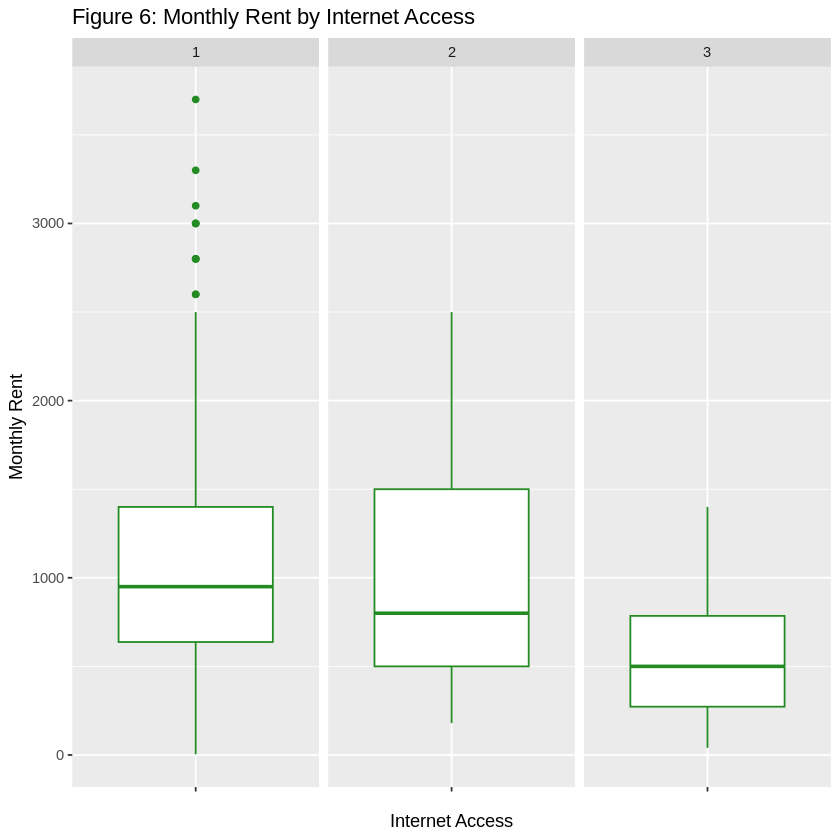

In [ ]:
#This is a boxplot of monthly rent by different levels of internet access
m13 <- gf_boxplot( RNTP ~ "" | ACCESS, data = dataset, color = "forestgreen")%>%
  gf_labs(x = "Internet Access", y = "Monthly Rent", title = "Figure 6: Monthly Rent by Internet Access")
m13

**Figure 6:** The box-plots of Monthly Rent faceted by the levels of Access to Internet, a qualitative variable, shows that there might be a significant difference on the average Monthly Rent between the different groups of Access to Internet. Although all the Monthly Rent distribution among the Access to Internet groups are rightly skewed, the median of Monthly Rent in level 1 and 2 is around 880 and 850, but the median of level 3 is 550.

This led us to conduct a ONE-WAY ANOVA, testing if there's an actual significant difference between the levels of monthly rent between each level of access to internet.

In [ ]:
#Running a One_Way ANOVA and Multiple Comparison
dataset <- mutate(dataset, ACCESSf = factor(ACCESS))
fm1 <- aov(data = dataset, RNTP ~ ACCESSf)
summary(fm1)

             Df   Sum Sq Mean Sq F value  Pr(>F)    
ACCESSf       2 1.10e+07 5499017    15.7 2.9e-07 ***
Residuals   358 1.25e+08  349829                    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

**Table 1:** The result showed that the F-test produced an F-ratio of 15.7, and a p-value of nearly zero, thus there's sufficient evidence to conclude that there is a significant difference in the mean Monthly Rent between different groups of Access to Internet.

This led us to conduct a multiple comparison test, testing where exactly the difference lies.

In [ ]:
#Tukey's HSD for difference in levels of access
PostHocTest(fm1, method = "hsd")


  Posthoc multiple comparisons of means : Tukey HSD 
    95% family-wise confidence level

$ACCESSf
        diff  lwr.ci   upr.ci    pval    
2-1  -24.721 -495.54  446.101  0.9916    
3-1 -514.651 -730.85 -298.451 1.3e-07 ***
3-2 -489.931 -995.57   15.705  0.0599 .  

---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


**Table 2:** We then ran a multiple comparison using Tukey's HSD method, since it's the most moderate. We discovered that for levels 1 and 2, there is no significant difference between the Monthly Rent, as the p-value turned out to be 0.99, which is sufficient evidence for no difference. However, for comparison between level 1 and 3, the p-value is nearly 0; and for comparison between 3 and 2, the p-value is 0.0599. So there is a significant difference in mean Monthly Rent between level 1 and 2, and level 3.

This led us to group the levels 1 and 2, which are households with internet access, and leave level 3 alone, which are households without internet access.

In [ ]:
#Change the data-set by grouping the levels 1 and 2 of ACCESS together
dataset2 <- mutate(dataset, ACCESSd = cut(ACCESS, breaks = c(0.5, 2.5, 4.5), labels = c("With Internet Acess", "Without Internet Acess")))

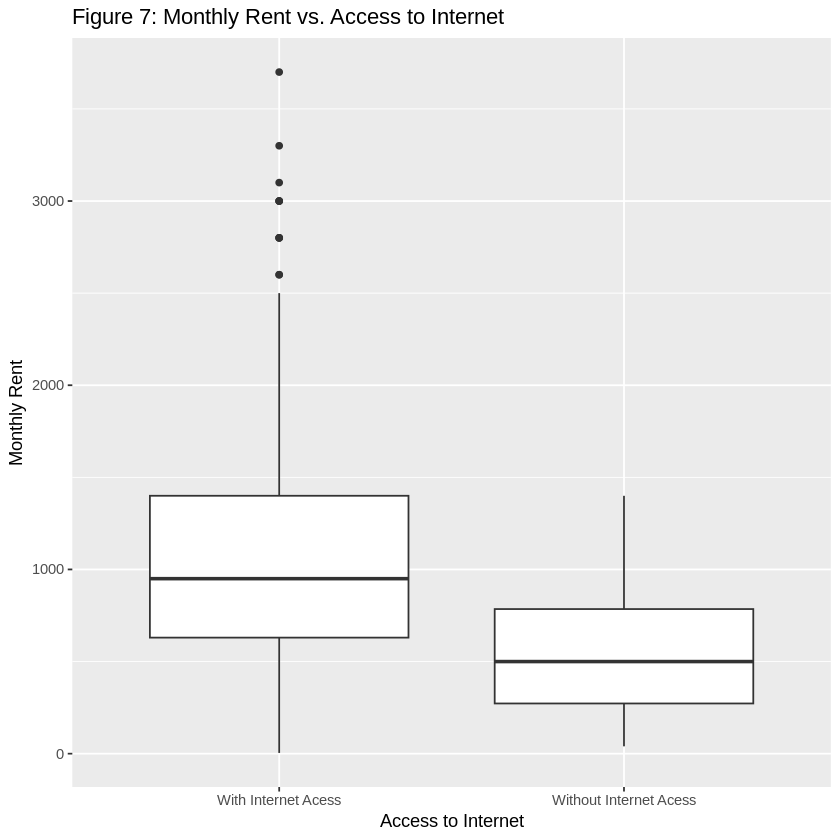

In [ ]:
#This is the boxplot of the household monthly rent against access to internet that has two levels right now.
gf_boxplot(RNTP ~ ACCESSd, data = dataset2)%>%
  gf_labs(title = "Figure 7: Monthly Rent vs. Access to Internet", x = "Access to Internet", y = "Monthly Rent")

**Figure 7:** This figure shows that the households with access to internet, on average, pay about \$500 more in terms of monthly rent, compared to households without access to internet.

## 4. Linear Regression Analysis

### 4.1. Model Selection and Fitting:

We first analyzed the issue of multicollinearity using GG-pairs plots and the VIF coefficients. We were satisfied with the results, as the GG-pairs plot showed no strong correlation between our explanatory variables, and all the VIF coefficients were less than 5.

We then used a ONE-WAY ANOVA to study if there was a statistically significant difference in monthly rent between households with different levels of internet access. We looked at the F-statistics and the associated p-value (significantly \<0.05) returned by the ONE-WAY ANOVA and concluded that there's a significant difference between the levels of Access to the Internet. This led us to conduct a Multiple Comparison Test with Tukey's HSD method to find out how groups differ because Tukey's HSD is the most moderate method we have learned. The result showed that there's a significant difference between level 3 (no access to the Internet), and levels 1 and 2 (both have access to the Internet), but there was no difference between levels 1 and 2. This means that having or not having access to the Internet makes a significant difference in the monthly rent, but there is not a significant difference between households that pay or do not pay a cell phone company or Internet service provider. Therefore, we grouped levels 1 and 2, leaving the variable "access to internet" with only two levels, with and without access to the internet.

Then we first used an automated variable selection process with the best subset method without attempting any transformations. By looking at the residual vs. fitted plot of the initial model, and the normal-qq plot of the initial model, we realized that the model had significant problems with both constant variance and normality conditions. We then used transformation of the variables with the square root function on all the quantitative variables, since all of them were very right skewed. The conditions are now fairly met.

Then we used another automated variable selection process with the best-subset method. We then conducted a Nested F-test between the two models with the best $R^2$ and Mallow's Cp, which are the model with square root of household income, square root of rooms in the property, and access to internet, and monthly cost of gas versus the same model without monthly cost of gas. The Nested F-test showed that the model with 3 predictors is the better one. We removed three points with unusually high standardized residuals, checked the conditions of constant variance and normality again by looking at residual vs. fitted plots and QQ plots, and we believed that conditions were overall satisfied.

In [ ]:
#checking the VIF of the new variables after transformation
sqrtkitchensink <- lm(sqrtRNTP ~ sqrtNOC + sqrtRMSP + sqrtGASP + sqrtELEP + sqrtHINCP + ACCESSd, data = dataset2)
car::vif(sqrtkitchensink)

sqrtNOC  sqrtRMSP  sqrtGASP  sqrtELEP sqrtHINCP   ACCESSd 
   1.1419    1.4469    1.2183    1.2963    1.0747    1.1159

**Table 3:** We started by checking the VIF of all the variables after transformations. All the VIF coefficients are below 2, which demonstrate that there is not significant issue of multillinearity.

In [ ]:
#Then we continue with a automated variable selection with best subset method
bestsubsets <- regsubsets(sqrtRNTP ~ sqrtNOC + sqrtRMSP + sqrtGASP + sqrtELEP + sqrtHINCP + ACCESSd, data = dataset2, nbest = 1)
with(summary(bestsubsets), data.frame(rsq, cp, outmat))

,rsq,cp,sqrtNOC,sqrtRMSP,sqrtGASP,sqrtELEP,sqrtHINCP,ACCESSdWithout.Internet.Acess
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1 ( 1 ),0.16270,32.0677,,,,,*,
2 ( 1 ),0.22222,6.4123,,,,,*,*
3 ( 1 ),0.22997,4.8115,,*,,,*,*
4 ( 1 ),0.23347,5.1830,,*,*,,*,*
5 ( 1 ),0.23624,5.8938,*,*,*,,*,*
6 ( 1 ),0.23817,7.0000,*,*,*,*,*,*


**Table 4:** We then used a an automated variable selection process with the best subset method. We landed on two models that are worth considering, one is the 3 variable model, which has $R^2$ of 0.229 and a Mallow's Cp of 4.81, and a 4 variable model, which has $R^2$ of 2.233 and a Mallow's Cp of 5.18.

In [ ]:
#Compare the 3 variable model and 4 variable model using nested F-test
sqrtmodel3 <- lm(sqrtRNTP ~ sqrtRMSP + sqrtHINCP + ACCESSd, data = dataset2)
sqrtmodel4 <- lm(sqrtRNTP ~ sqrtRMSP + sqrtGASP + sqrtHINCP + ACCESSd, data = dataset2)
anova(sqrtmodel3, sqrtmodel4)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,357,25654,NA,NA,NA,NA
2,356,25537,1,116.76,1.6276,0.20286


**Table 5:** We then compare whether adding a variable, The monthly cost of gas, is necessary, by conducting a Nested F-test. The Nested F-test returned an insignificant result (F = 1.63, p = 0.2). We concluded that it's unnecessary to have monthly cost of gas as an additional variable, and we proceeded with the 3 predictor model.

`geom_smooth()` using formula = 'y ~ x'


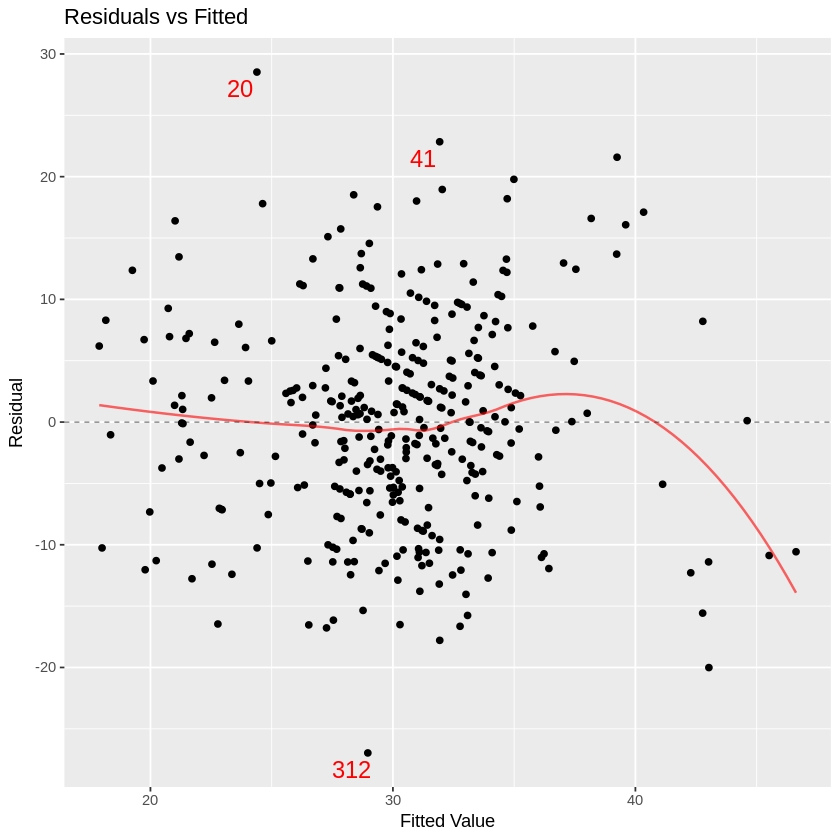

`geom_smooth()` using formula = 'y ~ x'


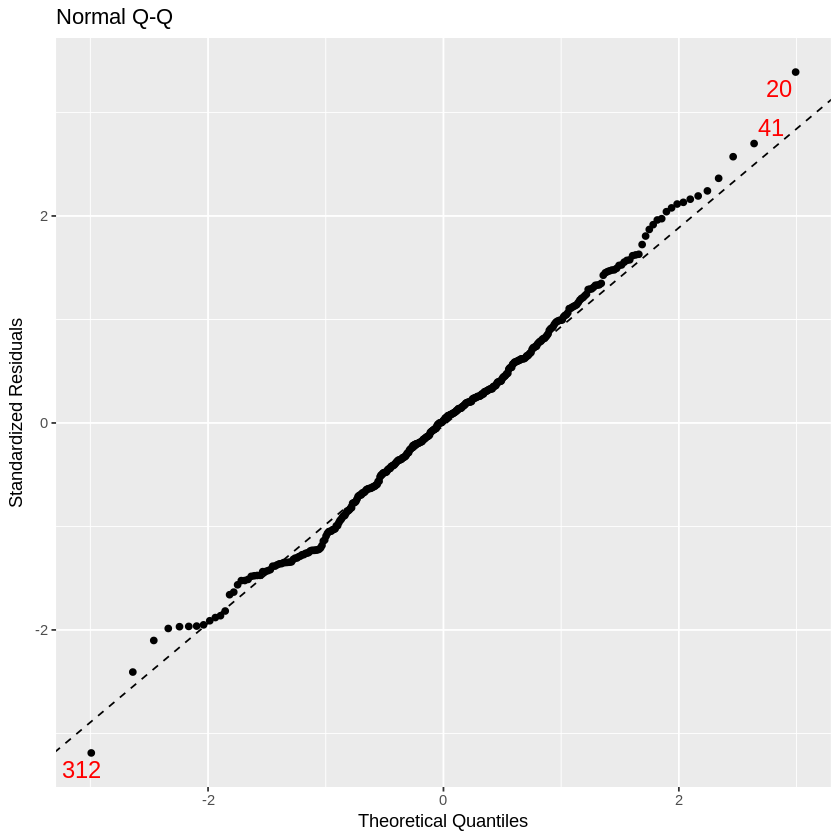

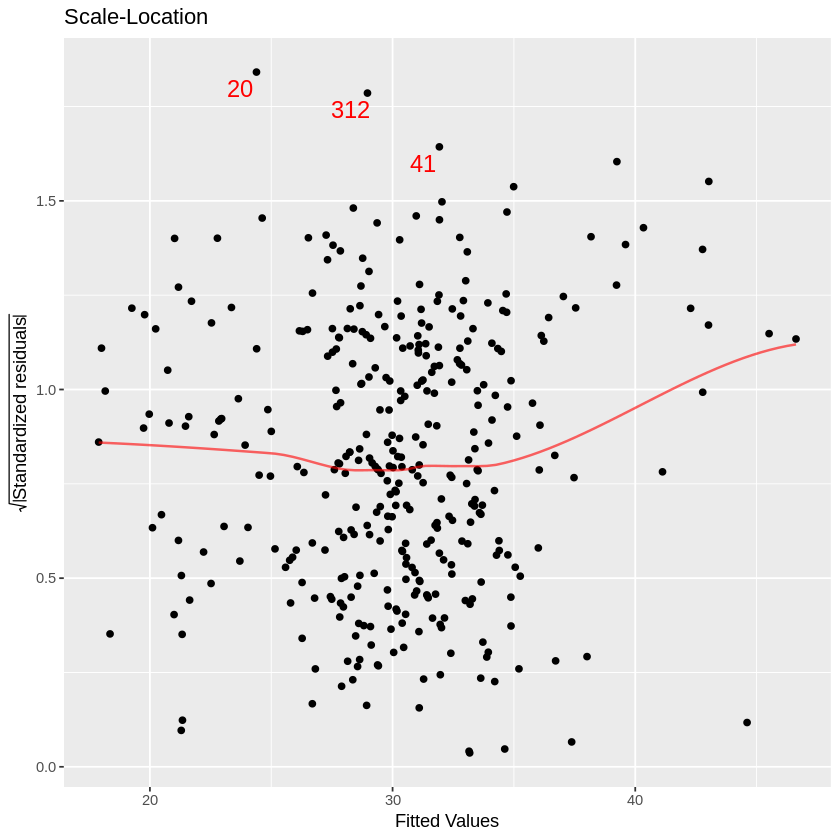

In [ ]:
#We will continue with a 3-variable model since the nested F-test returned insignificant

#Fit and Assess the model
mplot(sqrtmodel3, which = 1)
mplot(sqrtmodel3, which = 2)
mplot(sqrtmodel3, which = 3)

**Figure 8:** Here we check conditions of our 3 predictor model. By looking at the residual vs. fitted plot, the constant variance condition and the linearity condition seem mostly satisfied. Although there seems to be a few outliers, such as data #20, 41, 312.

By looking at the normal-qq plot, the normality condition also seem to be satisfied, except that there seems to be a bit of skewness at the tails.

By looking at the standardized residual plot, we see that #20, 41, 312 have the highest standardized residual, so we took a closer look at these individuals, and realized that they either have exceptionally high monthly rent, such as 20 and 41, or exceptionally low monthly rent, such as 312, which has \$4 per month. So we decided to remove these points.

`geom_smooth()` using formula = 'y ~ x'


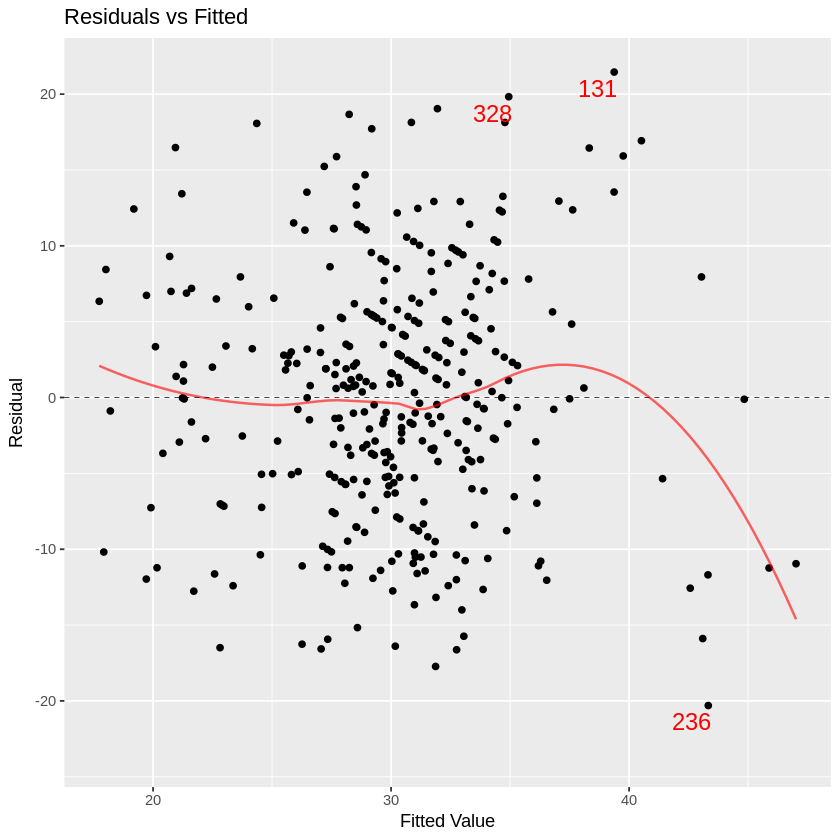

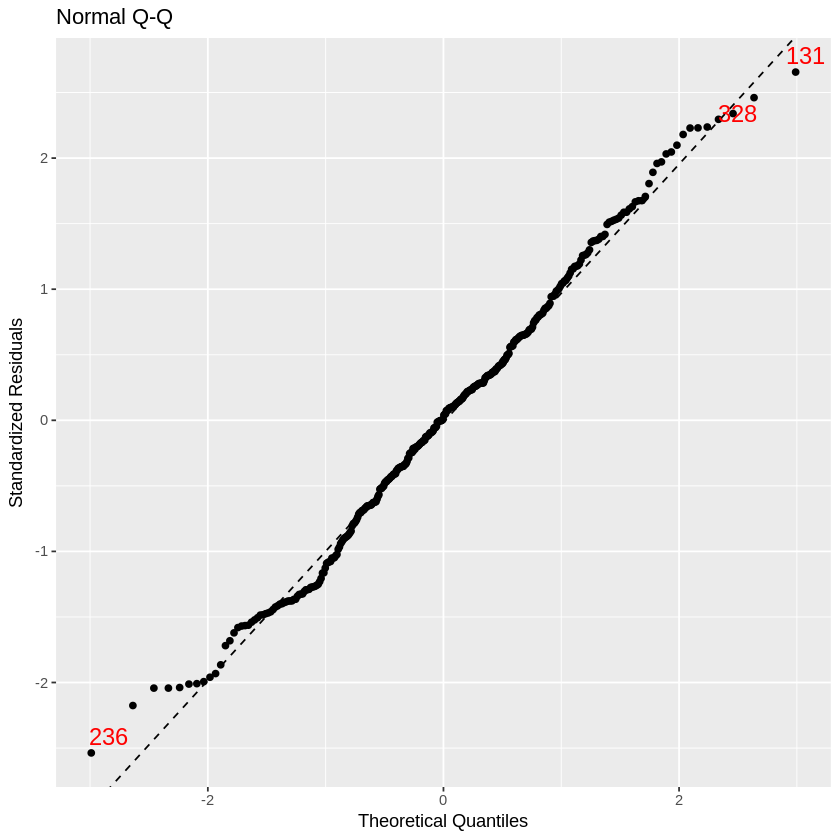

In [ ]:
#Further Attempt to Remove Outliers
dataset2_NOOutlier <- dataset2[-c(20, 41, 312),]
new_sqrtmodel3 <- lm(sqrtRNTP ~ sqrtRMSP + sqrtHINCP + ACCESSd, data = dataset2_NOOutlier)

#Fitting and Assessing the final model
mplot(new_sqrtmodel3, which = 1)
mplot(new_sqrtmodel3, which = 2)

**Figure 9:** After removing the three outliers, and look at the residual vs. fitted plot again, we see that constant variance condition has improved. All residuals now range from around -20 to 20. We see that normality condition has improved too, on the tails, by looking at the normal-qq plot. So we are satisfied that our conditions are met.

In [ ]:
#result: the best model from the above analysis
msummary(new_sqrtmodel3)

                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   20.13521    2.35904    8.54  4.2e-16 ***
sqrtRMSP                       1.98017    1.00883    1.96     0.05 .  
sqrtHINCP                      0.02803    0.00375    7.47  6.5e-13 ***
ACCESSdWithout Internet Acess -6.35648    1.32910   -4.78  2.5e-06 ***

Residual standard error: 8.16 on 354 degrees of freedom
Multiple R-squared:  0.249,	Adjusted R-squared:  0.242 
F-statistic: 39.1 on 3 and 354 DF,  p-value: <2e-16

**Table 6:** Here is our final model that we decided on. It's a 3 predictor model with square root of rooms in property (t = 1.96, p = 0.05), square root of household income (t = 7.47, p = 0.000), and access to internet (t= -4.78, p = 0.000), as the predictor variables. The final model has multiple $R^2$ of 0.249.

### 4.2. Results and Interpretation

Our final model has square root of monthly rent as the response variable, with three predictor variables, square root of rooms in property, square root of household, access to internet. Having accounted for the variance in other predictors, for each additional unit increase in the square root of rooms in the property, on average, the square root of monthly rent is expected to increase by 1.98, and for each additional unit increase in the square root of household income, on average, the square root of monthly rent is expected to increase by 0.028. And, having accounted for the variance in the two quantitative predictors, on average, households without internet access is expected to have lower square root of monthly rent by 6.356, compared to households with internet access.

In this project, we were interested in investigating what factors are correlated with monthly rent, and we have found that rooms in the property, household income, and internet access, are three significant factors that can help us predict monthly rent. We have discovered that as the number of rooms and household income increases, monthly rent is expected to increase. And we have discovered that on average, households without internet access can expect lower monthly rent compared to households with internet access. Surprisingly, monthly utility costs such as electricity costs and gas costs are not significant predictors, and so isn't the number of children as well.

### 4.3. Model Limitations

However, some of the limitations of our model include that it has a low $R^2$ value, which means that it explains a low amount of variance in the response variable, monthly rent. There were a lot of missing information in the original data-set, forcing us to remove a majority of the entries, which is another factor that impairs our model from explaining for more variance in monthly rent. The data-set itself is a huge data-set as well, incorporating over 200 variables. Trying to explain such a complicated issue as monthly rent with only 6 predictor variables is definitely to some extent unwise. So the result of the study should be treated carefully, and not generated to the population, due to the amount of missing information and low explained variance. Something that can be done to improve the model is to incorporate more variables from the data-set, with the hope that more variables would help explain more variability in monthly rent.

## 5. Logistic Regression Analysis

### 5.1. Purpose and Approach

Given the limitations of predicting rent as a continuous variable, we next explored a logistic regression model to classify households into "high rent" (rent above median) or "low rent" categories. This model allowed us to examine how the same set of predictors influences the likelihood of a household paying above-median rent.

In [ ]:
library(ggplot2)
library(caret)
library(pROC)

# Load the dataset
dataset3 <- read.csv("2019ACS_housing.csv")

# Create a binary target variable for rent classification
median_rent <- median(dataset3$RNTP, na.rm = TRUE)  # Calculate median rent
dataset3 <- dataset3 %>%
  mutate(high_rent = ifelse(RNTP > median_rent, 1, 0))  # Create binary variable


Attaching package: ‘caret’


The following objects are masked from ‘package:DescTools’:

    MAE, RMSE


The following object is masked from ‘package:mosaic’:

    dotPlot


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:mosaic’:

    cov, var


The following objects are masked from ‘package:stats’:

    cov, smooth, var




Here we select the same predictors as in linear regression and remove rows with missing values. After that, we convert categorical variables to factors for the model.

In [ ]:
# Select predictors
dataset3 <- dataset3 %>%
  select(high_rent, HINCP, RMSP, ACCESS, GASP, ELEP) %>%
  na.omit()  # Remove rows with missing values

# Convert categorical variables to factors
dataset3$ACCESS <- as.factor(dataset3$ACCESS)

Now we split the data into training and test sets to evaluate the model on unseen data.

In [ ]:
# Set a random seed for reproducibility
set.seed(230)

# Train-test split
trainIndex <- createDataPartition(dataset3$high_rent, p = 0.7, list = FALSE)
train_data <- dataset3[trainIndex, ]
test_data <- dataset3[-trainIndex, ]

### 5.2. Model Results and Interpretation

The logistic regression model aims to predict whether rent is "high" or "low" based on household characteristics such as income (`HINCP`), number of rooms (`RMSP`), internet access (`ACCESS`), monthly gas cost (`GASP`), and monthly electricity cost (`ELEP`). The model’s key parameters are interpreted as follows:

In [ ]:
# Fit the logistic regression model
logit_model <- glm(high_rent ~ HINCP + RMSP + ACCESS + GASP + ELEP,
                   data = train_data, family = binomial)

# View model summary
summary(logit_model)


Call:
glm(formula = high_rent ~ HINCP + RMSP + ACCESS + GASP + ELEP, 
    family = binomial, data = train_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.30e-01   4.21e-01   -0.55  0.58560    
HINCP        6.18e-06   2.61e-06    2.37  0.01787 *  
RMSP         1.22e-01   8.24e-02    1.48  0.14004    
ACCESS2     -4.43e-01   8.60e-01   -0.52  0.60647    
ACCESS3     -1.71e+00   4.58e-01   -3.73  0.00019 ***
GASP        -1.57e-03   2.07e-03   -0.76  0.44914    
ELEP        -1.82e-03   1.84e-03   -0.99  0.32393    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 348.26  on 252  degrees of freedom
Residual deviance: 313.09  on 246  degrees of freedom
AIC: 327.1

Number of Fisher Scoring iterations: 4


In [ ]:
# Exponentiate coefficients for interpretation
exp(coef(logit_model))

(Intercept)       HINCP        RMSP     ACCESS2     ACCESS3        GASP 
    0.79480     1.00001     1.12928     0.64220     0.18083     0.99844 
       ELEP 
    0.99818


-   Household Income (HINCP): The coefficient for `HINCP` is statistically significant (p = 0.0179), with an odds ratio close to `1.00001`. This indicates a slight increase in the odds of having high rent with increasing household income, though the effect s ize is minimal.

-   Number of Rooms (RMSP): The odds ratio for `RMSP` is `1.129`, which suggests that more rooms slightly increase the likelihood of high rent. However, this predictor is not statistically significant (p = 0.140), indicating a weak relationship with rent classification in this model.

-   Internet Access (ACCESS):

    -   ACCESS2 (some internet access) has an odds ratio of `0.642` but is not statistically significant (p = 0.606).

    -   ACCESS3 (no internet access) is statistically significant (p = 0.00019) with an odds ratio of `0.1808`, suggesting that households without internet access have lower odds of paying high rent.

-   Monthly Gas Cost (GASP) and Electricity Cost (ELEP): Both have odds ratios close to `1` and are not statistically significant, indicating they do not have meaningful impacts on the likelihood of high rent.

These results show that household income and lack of internet access are the strongest predictors of high rent classification in our dataset.

### 5.3. Model Performance

The model’s effectiveness can be further assessed through a confusion matrix and an ROC curve analysis:

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 16  4
         1 34 54
                                       
               Accuracy : 0.648        
                 95% CI : (0.55, 0.738)
    No Information Rate : 0.537        
    P-Value [Acc > NIR] : 0.0127       
                                       
                  Kappa : 0.262        
                                       
 Mcnemar's Test P-Value : 2.55e-06     
                                       
            Sensitivity : 0.320        
            Specificity : 0.931        
         Pos Pred Value : 0.800        
         Neg Pred Value : 0.614        
             Prevalence : 0.463        
         Detection Rate : 0.148        
   Detection Prevalence : 0.185        
      Balanced Accuracy : 0.626        
                                       
       'Positive' Class : 0            
                                       


Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "AUC: 0.73551724137931"


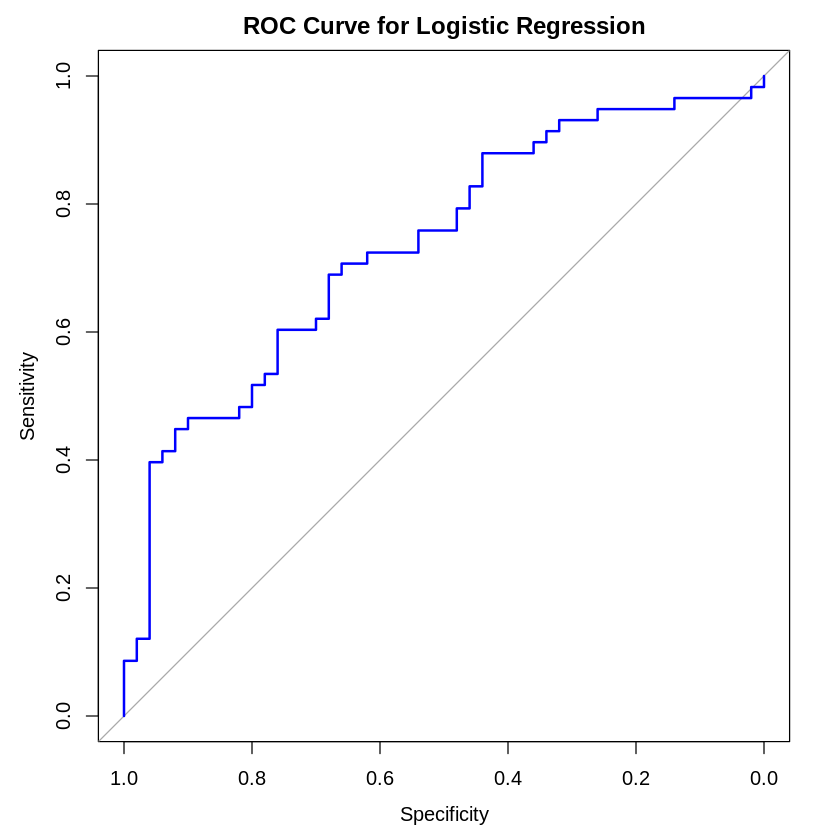

In [ ]:
# Make predictions on test data
test_data$predicted_prob <- predict(logit_model, test_data, type = "response")
test_data$predicted_class <- ifelse(test_data$predicted_prob > 0.5, 1, 0)

# Confusion matrix
confusion_matrix <- confusionMatrix(as.factor(test_data$predicted_class),
                                    as.factor(test_data$high_rent))
print(confusion_matrix)

# Plot ROC curve
roc_curve <- roc(test_data$high_rent, test_data$predicted_prob)
plot(roc_curve, col = "blue", main = "ROC Curve for Logistic Regression")
auc_score <- auc(roc_curve)
print(paste("AUC:", auc_score))


-   Confusion Matrix: The model achieves an accuracy of `64.8%`, which is modest. Specificity (ability to correctly identify "high rent" cases) is high at `0.931`, indicating that the model is quite effective at identifying households likely to pay high rent. However, the sensitivity (ability to correctly identify "low rent" cases) is only `0.320`, suggesting that the model misses many "low rent" classifications.

-   AUC (Area Under the Curve): The AUC score of `0.736` from the ROC curve demonstrates that the model has fair discriminatory power, able to reasonably distinguish between high and low rent categories.

From the logistic regression analysis, we derive several key insights:

-   Household Income: Consistent with our linear regression findings, household income is a significant predictor of high rent. Even though the effect size is small, income’s positive association with high rent aligns with our expectations.

-   Internet Access: Households without internet access are less likely to pay high rent, which may reflect socio-economic factors where higher-rent properties typically offer or are located in areas with better internet connectivity. This relationship was also noted in the linear regression, but logistic regression offers clearer interpretability in a categorical context.

-   Weak Predictors: The predictors for gas and electricity costs, as well as the number of rooms, do not have a strong impact on the classification of high vs. low rent. This result might suggest that utility costs and room count do not significantly influence the rent classification in this dataset, though they could impact exact rent amounts (as seen in linear regression).

### 5.4. Limitations

-   Limited Predictive Power: The model’s low sensitivity (32%) highlights that it struggles to identify "low rent" cases accurately, possibly due to the imbalance in variable importance or data distribution.

-   Simplistic Assumptions: Logistic regression assumes linear relationships between predictors and the log odds of the outcome. More complex, non-linear interactions might exist that are not captured by this model.

## 6. Conclusion

*It is important to note that the insights derived in this analysis are based solely on statistical associations observed within a limited dataset from the American Community Survey (2019). As a fundamental principle of statistics, these associations should not be interpreted as causal relationships. The findings suggest patterns and correlations between household characteristics and rent costs; however, they do not imply that any specific factor directly causes changes in rent. Various unobserved variables, such as location, neighborhood amenities, and broader economic conditions, may also play critical roles in determining rent that are not captured in this analysis.*

*Therefore, while the implications offer potentially useful insights for understanding rental trends, they must be interpreted with caution. Further research with a more comprehensive dataset and methods specifically designed to assess causality would be necessary to validate and expand upon these findings.*

### 6.1. Key Findings

This project uncovered several relationships between household characteristics and monthly rent:

1.  Income and Rent: Household income was consistently a strong predictor across both the linear and logistic models. Higher-income households tend to pay higher rent, reflecting the economic capacity to afford larger or more desirable properties.
2.  Internet Access: Access to the internet was significantly associated with higher rent costs. This finding suggests that internet access may serve as an indicator of housing infrastructure quality or neighborhood desirability.
3.  Utility Costs and Number of Rooms: Gas cost, electricity cost, and the number of rooms showed limited significance in predicting rent. Although these factors may influence exact rent values, they do not appear to impact rent in a way that affects overall rent categorization.

### 6.2. Practical Implications

The findings provide useful insights for companies, renters and policymakers. The insight that monthly utility costs and the number of children in a household don’t significantly impact rent allows companies to focus on factors that do—like household income, property size, and internet access.

1.  The lack of a strong association between monthly utility costs (gas and electricity) and rent suggests that tenants may not necessarily value pre-included utilities as highly as other amenities (e.g., internet access). Property managers and utility companies could consider separate billing for utilities rather than bundling them into rent.

2.  Since the number of children in a household does not significantly affect rent costs in this analysis, property managers might find that family-oriented marketing doesn’t need to prioritize units based solely on family size but could focus on other appealing features, like neighborhood quality or proximity to schools. Real estate companies and developers could also focus on designing rental units that appeal broadly to all household types rather than specifically targeting family-sized units.

3.  Since utilities and household composition (e.g., number of children) do not correlate strongly with rent in this dataset, companies may benefit from prioritizing investments in amenities that show a stronger association with rent. For instance, enhancing internet connectivity or focusing on modern, location-based amenities (such as fitness centers or co-working spaces).

4.  The correlation between internet access and rent suggests that properties in areas with infrastructure for internet may command higher rental prices, potentially creating accessibility barriers for lower-income families. This insight could inform policies aimed at promoting equitable access to affordable housing.

### 6.3. Limitations and Future Directions

The relatively low R-squared value in our linear model indicates that the predictors used explain only a portion of the variance in rent. Furthermore, the logistic model’s moderate sensitivity suggests that additional features may enhance rent classification accuracy.

To improve model performance and address limitations, we have attempted to add the interaction terms between log_income \* ACCESS and log_rooms \* log_income. However, the result did not yield a noticeable improvement in $R^2$. Given the not so impressive outcome and the complication of the new model, we decided to remove the interaction terms and keep the simpler version.

Future Work: To improve the predictive power of these models, future work could incorporate more detailed geographic data, such as neighborhood demographics or proximity to city centers, which may be critical in explaining rent variability. Additionally, exploring non-linear or more complex models (e.g., decision trees or random forests) could capture interactions between predictors that were not addressed in this study.

## 7. Acknowledgments

I would like to express my sincere appreciation to Professor Pamela B. Matheson who taught me Intermediate Statistics at Amherst College for her invaluable feedback and support in drafting the early stages of this project. Her insights were crucial in helping shape the project’s focus and approach.